# Régression linéaire multiple

In [96]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [97]:
#on importe un dataset contenant les caractéristiques chimiques et/ou physiques de vins. L'objectif est de créer un modèle permettant de prédire la qualité du vin selon ces caractéristiques
df = pd.read_csv("../Data/winequality-white.csv", delimiter=";")

#on enleve les lignes nulles
df = df.dropna()
print(df.head)

listeEntetes = list(df.columns)
#print(listeEntetes)

print(df[:1])
x = []
for i in range(len(df)):
    ligne = []
    for j in range(len(listeEntetes)-1):
        ligne.append(df.iloc[i,j])
    x.append(ligne)

#on convertit la liste des features en un vecteur, et on récupère les labels du dataset qu'on stocke dans un vecteur
x = np.array(x)
y = np.array(df[listeEntetes[len(listeEntetes)-1]])

y=y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)
print(x)
print(y)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [98]:
"""# Représentation graphique du modèle en 3d 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='12d')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5, 180)
plt.show()
"""
#on représente chaque feature dans un graphique en 2d

"# Représentation graphique du modèle en 3d \nfig = plt.figure(figsize=(8,8))\n\nax = fig.add_subplot(111, projection='12d')\nax.scatter(x[:,0], x[:,1], y, c='b', marker='o')\n\nax.set_xlabel('X')\nax.set_ylabel('Y')\nax.set_zlabel('Z')\n\nax.view_init(5, 180)\nplt.show()\n"

## Modèle

In [99]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [100]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [101]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/(2*len(y))) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [102]:
#on va utiliser une régression linéaire multiple, avec n paramètres 
theta = np.random.randn(x.shape[1]+1,1)
print(theta.shape)
print(theta)

(12, 1)
[[-1.3992469 ]
 [ 1.14984223]
 [-0.82810804]
 [-1.94962597]
 [-1.72452252]
 [ 1.13122716]
 [-0.8940247 ]
 [ 1.648125  ]
 [ 0.66212877]
 [ 1.5405361 ]
 [-0.02844898]
 [-0.55923172]]


In [103]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X)


(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   1.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   1.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   1.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   1.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   1.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   1.  ]]


In [109]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X, y, theta, 0.0001, 10000)
newTheta = resultDescenteGradientPol[0]
varCout = resultDescenteGradientPol[1]

print(newTheta.shape)
print(newTheta)

(12, 1)
[[-6.25454898e-01]
 [ 1.15217249e+00]
 [-7.86834447e-01]
 [ 4.78265502e-02]
 [-1.72158104e+00]
 [ 3.92225792e-03]
 [ 1.05189141e-04]
 [ 1.71387370e+00]
 [ 8.26600137e-01]
 [ 1.55767456e+00]
 [ 4.86951378e-01]
 [-4.93915729e-01]]


[[5.44416202]
 [5.52547757]
 [4.82334724]
 ...
 [5.15029692]
 [7.54914063]
 [6.43166419]]


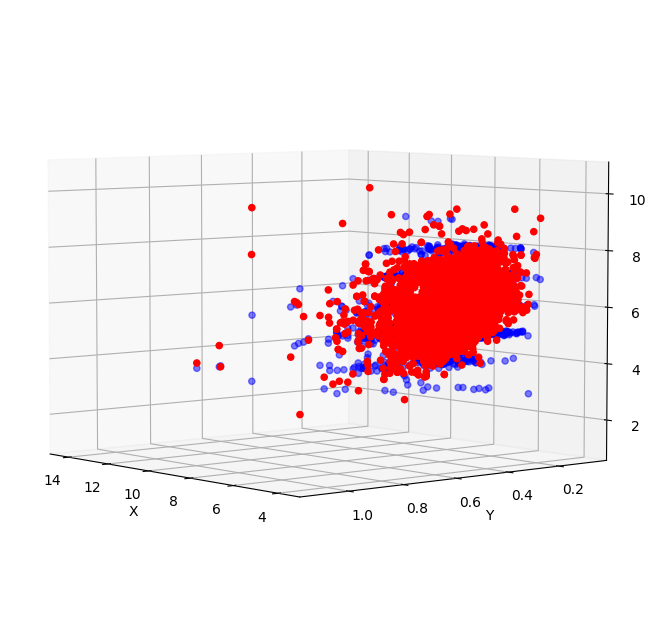

In [110]:
y_predictions = model(X, newTheta)
print(y_predictions)
x1, x2 = np.linspace(-2, 2, 1), np.linspace(-2, 2, 1)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y, color='b', alpha=0.5)
ax.scatter(x[:,0], x[:,1], y_predictions, color='r', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5,-220)
plt.show()

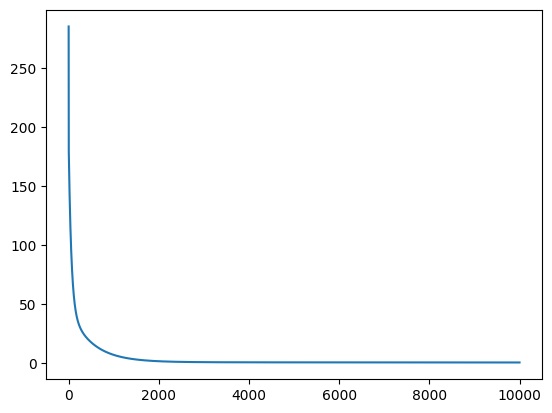

In [112]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(10000)], varCout)

In [113]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions)
print(coeffPredictions_pol)

-0.3539909087080475
